# Task 4.10 - Final Report

## Contents

### 1. Importing Libraries and Data
### 2. Addressing PII Data
### 3. Comparing Customer Behavior in Different Geographic Areas
### 4. Exclusion Flag for Low-Activity Customers
### 5 and 6. Profiling Customers and Visualizations
- Age Groups
- Income Groups
- Number of Dependants
- Diet

### 7. Profile Aggregation
### 8. Customer Profiles with Region and Departments
### 9. Visuals Illustrating Profiles
### 10. Exporting Dataframe

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# 1) Import Dataframes

In [2]:
# Creating a path variable
path = r'C:\Users\Aaron\CareerFoundry\Instacart Basket Analysis'

In [3]:
# Import ords_prods_cust
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_cust.pkl'))

### Checking Our Dataframe

In [4]:
# Change it to show all columns.
pd.options.display.max_columns = None

In [5]:
df.head()

,order_id,user_id,order_number,orders_day_of_week,order_time,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_price_spent,spending_flag,median_since_prior_orders,order_frequency_flag,first_name,last_name,state,age,n_dependants,income,_merge
0,2539329.0,1.0,1.0,2.0,8.0,11.0,196,1.0,0.0,Soda,77.0,7.0,9.0,Mid-range product,Regularly busy,Average orders,10.0,New customer,6.367797,Low spender,20.0,Regular customer,Linda,Nguyen,Alabama,31,3,40423,both
1,2398795.0,1.0,2.0,3.0,7.0,15.0,196,1.0,1.0,Soda,77.0,7.0,9.0,Mid-range product,Slowest days,Average orders,10.0,New customer,6.367797,Low spender,20.0,Regular customer,Linda,Nguyen,Alabama,31,3,40423,both
2,473747.0,1.0,3.0,3.0,12.0,21.0,196,1.0,1.0,Soda,77.0,7.0,9.0,Mid-range product,Slowest days,Most orders,10.0,New customer,6.367797,Low spender,20.0,Regular customer,Linda,Nguyen,Alabama,31,3,40423,both
3,2254736.0,1.0,4.0,4.0,7.0,29.0,196,1.0,1.0,Soda,77.0,7.0,9.0,Mid-range product,Slowest days,Average orders,10.0,New customer,6.367797,Low spender,20.0,Regular customer,Linda,Nguyen,Alabama,31,3,40423,both
4,431534.0,1.0,5.0,4.0,15.0,28.0,196,1.0,1.0,Soda,77.0,7.0,9.0,Mid-range product,Slowest days,Most orders,10.0,New customer,6.367797,Low spender,20.0,Regular customer,Linda,Nguyen,Alabama,31,3,40423,both


In [6]:
df.shape

(30658154, 29)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30658154 entries, 0 to 30658153
Data columns (total 29 columns):
 #   Column                     Dtype   
---  ------                     -----   
 0   order_id                   float64 
 1   user_id                    float64 
 2   order_number               float64 
 3   orders_day_of_week         float64 
 4   order_time                 float64 
 5   days_since_prior_order     float64 
 6   product_id                 int64   
 7   add_to_cart_order          float64 
 8   reordered                  float64 
 9   product_name               object  
 10  aisle_id                   float64 
 11  department_id              float64 
 12  prices                     float64 
 13  price_range_loc            object  
 14  busiest_days               object  
 15  busiest_period_of_day      object  
 16  max_order                  float64 
 17  loyalty_flag               object  
 18  avg_price_spent            float64 
 19  spending_flag      

# 2) Address Any PII Data

#### Our dataframe contains personally identifiable information (PII) in the form of first names and last names. We must remove these columns in order to be able to move forward with our analysis.

In [8]:
# Removing first_name and last_name columns
df_safe = df.drop(columns = ['first_name', 'last_name'])

In [9]:
# Checking to see if we have 2 less columns in our updated dataframe
df_safe.shape

(30658154, 27)

# 3) Comparing Customer Behavior in Different Geographic Areas

In [10]:
# Group states to different regions according to Wikipedia link
northeast = ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']
midwest = ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']
south = ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']
west = ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']

In [11]:
# If-Statements with the loc() function
df_safe.loc[df_safe['state'].isin(northeast), 'region'] = 'Northeast'
df_safe.loc[df_safe['state'].isin(midwest), 'region'] = 'Midwest'
df_safe.loc[df_safe['state'].isin(south), 'region'] = 'South'
df_safe.loc[df_safe['state'].isin(west), 'region'] = 'West'

In [12]:
# Check our dataframe
# Last column should be 'region'
df_safe.head()

,order_id,user_id,order_number,orders_day_of_week,order_time,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_price_spent,spending_flag,median_since_prior_orders,order_frequency_flag,state,age,n_dependants,income,_merge,region
0,2539329.0,1.0,1.0,2.0,8.0,11.0,196,1.0,0.0,Soda,77.0,7.0,9.0,Mid-range product,Regularly busy,Average orders,10.0,New customer,6.367797,Low spender,20.0,Regular customer,Alabama,31,3,40423,both,South
1,2398795.0,1.0,2.0,3.0,7.0,15.0,196,1.0,1.0,Soda,77.0,7.0,9.0,Mid-range product,Slowest days,Average orders,10.0,New customer,6.367797,Low spender,20.0,Regular customer,Alabama,31,3,40423,both,South
2,473747.0,1.0,3.0,3.0,12.0,21.0,196,1.0,1.0,Soda,77.0,7.0,9.0,Mid-range product,Slowest days,Most orders,10.0,New customer,6.367797,Low spender,20.0,Regular customer,Alabama,31,3,40423,both,South
3,2254736.0,1.0,4.0,4.0,7.0,29.0,196,1.0,1.0,Soda,77.0,7.0,9.0,Mid-range product,Slowest days,Average orders,10.0,New customer,6.367797,Low spender,20.0,Regular customer,Alabama,31,3,40423,both,South
4,431534.0,1.0,5.0,4.0,15.0,28.0,196,1.0,1.0,Soda,77.0,7.0,9.0,Mid-range product,Slowest days,Most orders,10.0,New customer,6.367797,Low spender,20.0,Regular customer,Alabama,31,3,40423,both,South


In [13]:
# Count values of region column
df_safe['region'].value_counts(dropna = False)

South        10208462
West          7839106
Midwest       7183231
Northeast     5427355
Name: region, dtype: int64

In [14]:
# Create a crosstab to compare region and spending_flag
region_spending_crosstab = pd.crosstab(df_safe['region'], df_safe['spending_flag'], dropna = False)

In [15]:
# Checking crosstab
region_spending_crosstab

spending_flag,High spender,Low spender
region,,
Midwest,149888,7033343
Northeast,101468,5325887
South,196637,10011825
West,147850,7691256


South region has the greatest amount of both high and low spenders compared to other regions. This could be due to the fact that this region contains the most states as well.

Midwest and West regions are nearly identical, with Midwest having more high spenders, and West having more low spenders.

Northeast is the lowest among all regions in both high and low spenders.

# 4) Exclusion Flag for Low-Activity Customers

In order to remove low activity customers, we must look at the max_order column and exclude anyone with a max_order value of less than 5 orders.

In [16]:
df_2 = df_safe[df_safe['max_order'] >= 5]

In [17]:
# Checking the new dataframe
df_2.shape

(29298154, 28)

In [18]:
# Comparing df_safe shape with the new df
df_safe.shape

(30658154, 28)

Looks like we removed about 1,360,000 rows by excluding low activity customers

# 5 & 6) Profiling Customers and Visualizations

## Customers Age

In [20]:
df_2['age'].describe()

count    2.929815e+07
mean     4.947572e+01
std      1.847850e+01
min      1.800000e+01
25%      3.400000e+01
50%      4.900000e+01
75%      6.500000e+01
max      8.100000e+01
Name: age, dtype: float64

### Histogram for Customer Age

<AxesSubplot:ylabel='Frequency'>

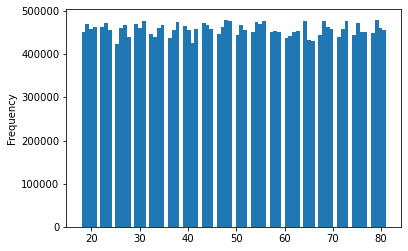

In [21]:
df_2['age'].plot.hist(bins = 81)

### Grouping Customers Into 3 Different Droups According to Age

In [22]:
# Create age_group classification
df_2.loc[df_2['age'] < 36, 'age_group'] = 'Young Adult'
df_2.loc[(df_2['age'] >= 36) & (df_2['age'] < 65), 'age_group'] = 'Middle Aged'
df_2.loc[df_2['age'] >= 65, 'age_group'] = 'Senior'

C:\Users\Aaron\anaconda3\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\Aaron\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
C:\Users\Aaron\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

In [23]:
# Counting the values for each group
df_2['age_group'].value_counts(dropna = False)

Middle Aged    13300714
Young Adult     8251190
Senior          7746250
Name: age_group, dtype: int64

### Bar Chart for Age Groups

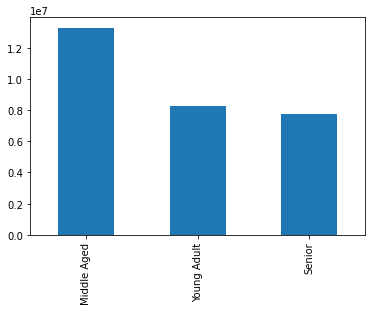

In [24]:
age_group_bar = df_2['age_group'].value_counts().plot.bar()

### Pie Chart for Age Groups

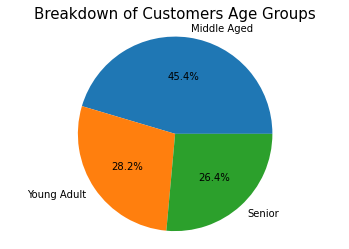

In [25]:
my_data = [13300714, 8251190, 7746250]
my_labels = 'Middle Aged', 'Young Adult', 'Senior'
cust_age_pie = plt.pie(my_data, labels=my_labels, autopct='%1.1f%%')
plt.title('Breakdown of Customers Age Groups', fontsize = 15)
plt.axis('equal')
plt.show()

## Customer Income

In [26]:
df_2['income'].describe()

count    2.929815e+07
mean     9.969409e+04
std      4.314632e+04
min      2.590300e+04
25%      6.736300e+04
50%      9.676000e+04
75%      1.281380e+05
max      5.939010e+05
Name: income, dtype: float64

### Scatterplot For Customer Age and Income

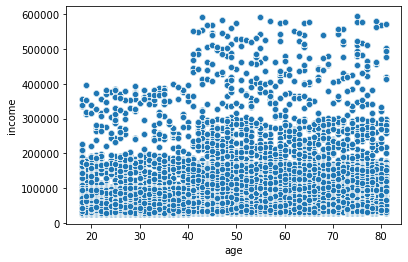

In [27]:
scat_age_income = sns.scatterplot(x = 'age', y = 'income', data = df_2)

### Grouping Customers By Their Income

Customers will be divided into 3 groups based on their income.

Group 1 = income of 0 - 50,000

Group 2 = income of 50,001 = 100,000

Group 3 = income of 100,000+

In [28]:
# Dividing customers into 3 groups
df_2.loc[(df_2['income'] <= 50000), 'income_group'] = '0-50k'
df_2.loc[(df_2['income'] > 50000) & (df_2['income'] <= 100000), 'income_group'] = '50k-100k'
df_2.loc[(df_2['income'] > 100000), 'income_group'] = '100k+'

C:\Users\Aaron\anaconda3\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\Aaron\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
C:\Users\Aaron\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

In [29]:
# Counting the values of each group
df_2['income_group'].value_counts(dropna = False)

100k+       13447376
50k-100k    12678554
0-50k        3172224
Name: income_group, dtype: int64

### Bar Chart Showing Income Groups

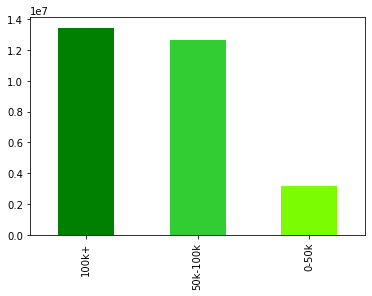

In [30]:
income_group_bar = df_2['income_group'].value_counts().plot.bar(color = ['green', 'limegreen', 'lawngreen'])

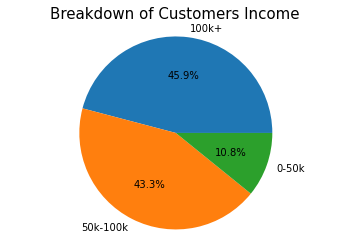

In [31]:
my_data = [13447376, 12678554, 3172224]
my_labels = '100k+', '50k-100k', '0-50k'
cust_income_pie = plt.pie(my_data, labels=my_labels, autopct='%1.1f%%')
plt.title('Breakdown of Customers Income', fontsize = 15)
plt.axis('equal')
plt.show()

## Customer Number of Dependants

In [32]:
df_2['n_dependants'].describe()

count    2.929815e+07
mean     1.501585e+00
std      1.118501e+00
min      0.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      3.000000e+00
max      3.000000e+00
Name: n_dependants, dtype: float64

### Line Chart showing age and number of dependants

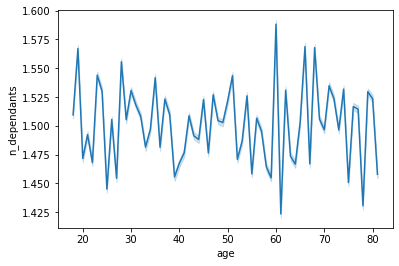

In [33]:
age_dependants_line = sns.lineplot(data = df_2, x = 'age', y = 'n_dependants')

### Crosstab of Age and n_dependents

In [34]:
age_dependants_crosstab = pd.crosstab(df_2['age'], df_2['n_dependants'], dropna = False)

In [35]:
age_dependants_crosstab

n_dependants,0,1,2,3
age,,,,
18,111137,118448,104312,118713
19,99747,126206,122180,122123
20,113942,122360,113325,108323
21,113141,120622,118438,111528
22,120692,119744,107509,114950
...,...,...,...,...
77,108139,113201,121154,109855
78,118062,118613,112884,99214
79,113360,119295,125301,120832


In [36]:
# Count of customers and how many dependants they have
df_2['n_dependants'].value_counts(dropna = False)

3    7344798
2    7325527
0    7319617
1    7308212
Name: n_dependants, dtype: int64

### Pie Chart Showing Distribution of Customers and the Number of Children They Have

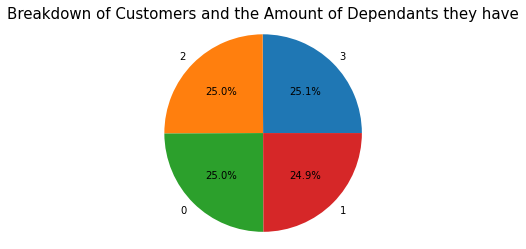

In [37]:
my_data = [7344798, 7325527, 7319617, 7308212]
my_labels = '3', '2', '0', '1'
cust_dependants_pie = plt.pie(my_data, labels=my_labels, autopct='%1.1f%%')
plt.title('Breakdown of Customers and the Amount of Dependants they have', fontsize = 15)
plt.axis('equal')
plt.show()

## Customers Diet
For department_id profiling variable, I will group customers into 2 groups, vegans and non-vegans. To do so, customers who did NOT purhcase any meat/seafood and/or dairy/eggs will be categorized as vegans.

In [38]:
# Creating a crosstab between 'department_id' and 'user_id'

dept_user_crosstab = pd.crosstab(df_2['department_id'], df_2['user_id'], dropna = False)

In [39]:
# Assigning vegan flags to users and storing it in a dictionary
vegan_dict = dict()
for user in dept_user_crosstab:
    workinglist = dept_user_crosstab[user].tolist()
    if workinglist[11] == 0 and workinglist[15] == 0:
        vegan_dict[user] = 'Vegan'
    else:
        vegan_dict[user] = 'Non-vegan'

In [40]:
# assigning user flags to the list
vegan_list = []
for user in df_2['user_id']:
    vegan_list.append(vegan_dict[user])

In [41]:
#Adding 'vegan_nonvegan' column to our main dataframe
df_2['vegan_nonvegan'] = vegan_list

<ipython-input-41-a8f252109ce8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['vegan_nonvegan'] = vegan_list


In [42]:
# Check our df, new column should be the last one
df_2.head()

,order_id,user_id,order_number,orders_day_of_week,order_time,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_price_spent,spending_flag,median_since_prior_orders,order_frequency_flag,state,age,n_dependants,income,_merge,region,age_group,income_group,vegan_nonvegan
0,2539329.0,1.0,1.0,2.0,8.0,11.0,196,1.0,0.0,Soda,77.0,7.0,9.0,Mid-range product,Regularly busy,Average orders,10.0,New customer,6.367797,Low spender,20.0,Regular customer,Alabama,31,3,40423,both,South,Young Adult,0-50k,Non-vegan
1,2398795.0,1.0,2.0,3.0,7.0,15.0,196,1.0,1.0,Soda,77.0,7.0,9.0,Mid-range product,Slowest days,Average orders,10.0,New customer,6.367797,Low spender,20.0,Regular customer,Alabama,31,3,40423,both,South,Young Adult,0-50k,Non-vegan
2,473747.0,1.0,3.0,3.0,12.0,21.0,196,1.0,1.0,Soda,77.0,7.0,9.0,Mid-range product,Slowest days,Most orders,10.0,New customer,6.367797,Low spender,20.0,Regular customer,Alabama,31,3,40423,both,South,Young Adult,0-50k,Non-vegan
3,2254736.0,1.0,4.0,4.0,7.0,29.0,196,1.0,1.0,Soda,77.0,7.0,9.0,Mid-range product,Slowest days,Average orders,10.0,New customer,6.367797,Low spender,20.0,Regular customer,Alabama,31,3,40423,both,South,Young Adult,0-50k,Non-vegan
4,431534.0,1.0,5.0,4.0,15.0,28.0,196,1.0,1.0,Soda,77.0,7.0,9.0,Mid-range product,Slowest days,Most orders,10.0,New customer,6.367797,Low spender,20.0,Regular customer,Alabama,31,3,40423,both,South,Young Adult,0-50k,Non-vegan


In [43]:
# Counting our vegan and non-vegan values
df_2['vegan_nonvegan'].value_counts(dropna = False)

Non-vegan    29005466
Vegan          292688
Name: vegan_nonvegan, dtype: int64

### Pie Chart Visualization of Customers Who Are Vegan or Non-Vegan

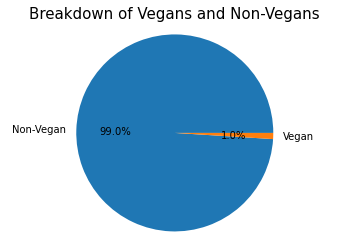

In [44]:
my_data = [29005466, 292688]
my_labels = 'Non-Vegan', 'Vegan'
cust_vegan_pie = plt.pie(my_data, labels=my_labels, autopct='%1.1f%%')
plt.title('Breakdown of Vegans and Non-Vegans', fontsize = 15)
plt.axis('equal')
plt.show()

# 7) Profile Aggregation

#### Age Group Frequency and Expenditure

In [45]:
df_2.groupby('age_group').agg({'days_since_prior_order': ['mean', 'max', 'min'], 'prices': ['mean', 'max', 'min']})

days_since_prior_order               prices           
                              mean   max  min      mean   max  min
age_group                                                         
Middle Aged              10.826651  30.0  0.0  7.791605  25.0  1.0
Senior                   10.805663  30.0  0.0  7.797306  25.0  1.0
Young Adult              10.848716  30.0  0.0  7.786122  25.0  1.0

It seems that all 3 age groups shop within the same frequency and spend just about the same amount. The age group that leads both categories, however, are the Seniors. They seem to have a slightly higher frequency and slightly higher spending average.

#### Income Group Frequency and Expenditure

In [46]:
df_2.groupby('income_group').agg({'days_since_prior_order': ['mean', 'max', 'min'], 'prices': ['mean', 'max', 'min']})

days_since_prior_order               prices           
                               mean   max  min      mean   max  min
income_group                                                       
0-50k                     11.179271  30.0  0.0  6.709467  25.0  1.0
100k+                     10.785523  30.0  0.0  7.952964  25.0  1.0
50k-100k                  10.783583  30.0  0.0  7.891137  25.0  1.0

The 0-50k income group shop less frequently compared to the other 2 groups. They also spend the least amount. The 100k+ income group shop the most frequent and spend the most, though their averages aren't too far off from the 50k-100k income group.

#### Vegan/Non-Vegan Frequency and Expenditure

In [47]:
df_2.groupby('vegan_nonvegan').agg({'days_since_prior_order': ['mean', 'max', 'min'], 'prices': ['mean', 'max', 'min']})

days_since_prior_order               prices           
                                 mean   max  min      mean   max  min
vegan_nonvegan                                                       
Non-vegan                   10.799504  30.0  0.0  7.799942  25.0  1.0
Vegan                       13.583519  30.0  0.0  6.961879  20.0  1.0

Non-Vegans shop more frequently and spend more than their counterpart, the vegan group.

#### Number of Dependants Frequency and Expenditure

In [48]:
# vegan_profile stats

df.groupby('n_dependants').agg({'days_since_prior_order': ['mean', 'max', 'min'], 'prices': ['mean', 'max', 'min']})

days_since_prior_order               prices           
                               mean   max  min      mean   max  min
n_dependants                                                       
0                         11.079239  30.0  0.0  7.789555  25.0  1.0
1                         11.103335  30.0  0.0  7.797853  25.0  1.0
2                         11.117725  30.0  0.0  7.785880  25.0  1.0
3                         11.113575  30.0  0.0  7.794375  25.0  1.0

Customers with children surprisingly shop less frequently as those without dependants. However, they do have a tendency to spend more, especially those with 1 child and those with 3 children.

# 8) Customer Profiles with Regions and Departments

We must compare customer profiles with regions by creating a crosstab

## Age Group

### Age Group and Region

In [49]:
age_region_crosstab = pd.crosstab(df_2['age_group'], df_2['region'])

In [50]:
age_region_crosstab

region,Midwest,Northeast,South,West
age_group,,,,
Middle Aged,3172348,2300109,4409650,3418607
Senior,1794469,1415377,2559048,1977356
Young Adult,1899062,1467679,2787325,2097124


Middle Aged customers are the largest age group in all regions, with the South having the greatest number of each age groups. Seniors have the smallest group among all age groups and they make up the smallest number of customers for all regions as well.

### Age Group and Departments

In [73]:
age_dept_crosstab = pd.crosstab(df_2['department_id'], df_2['age_group'])

In [74]:
age_dept_crosstab

age_group,Middle Aged,Senior,Young Adult
department_id,,,
1.0,910620,531902,563904
2.0,14619,8336,9320
3.0,481046,279456,299324
4.0,3898963,2275441,2411950
5.0,62478,34526,40938
6.0,109890,63257,68952
7.0,1107799,646326,676532
8.0,39506,23647,24700
9.0,352655,205151,219998


The most commonly purchased items come from these departments:
- produce (dept. 4)
- beverages (dept. 7)
- dairy/eggs (dept. 16)
- snacks (dept. 19)

## Income Group

### Income Group and Region

In [53]:
income_region_crosstab = pd.crosstab(df_2['income_group'], df_2['region'])

In [54]:
income_region_crosstab

region,Midwest,Northeast,South,West
income_group,,,,
0-50k,742335,555792,1077497,796600
100k+,3225379,2393954,4407145,3420898
50k-100k,2898165,2233419,4271381,3275589


Most of our customers come from the 100k+ income group, regardless of region.

However, it is important to note that in the Northeast, South, and West regions, there are almost as many customers from 50k-100k income groups as there are in the 100k+ income group.

### Income Group and Departments

In [80]:
income_department_crosstab = pd.crosstab(df_2['department_id'], df_2['income_group'])

In [81]:
income_department_crosstab

income_group,0-50k,100k+,50k-100k
department_id,,,
1.0,203601,933765,869060
2.0,3598,14772,13905
3.0,100732,499483,459611
4.0,777954,4007585,3800815
5.0,16801,65811,55330
6.0,20391,113306,108402
7.0,362569,1064067,1004021
8.0,8092,42734,37027
9.0,60601,371441,345762


Most ordered products come from these departments:
- produce
- dairy and eggs

Those with higer incomes buy more items from the produce department compared to the other two groups. Could it be that since they have a higher income, they could afford fresh produce and have a healthier diet?

## Vegan / Non-Vegan

### Vegan / Non-Vegan and Region

In [57]:
vegan_region_crosstab = pd.crosstab(df_2['vegan_nonvegan'], df_2['region'])

In [58]:
vegan_region_crosstab

region,Midwest,Northeast,South,West
vegan_nonvegan,,,,
Non-vegan,6795706,5131907,9661130,7416723
Vegan,70173,51258,94893,76364


Most of our Vegan customers come from the South region, followed by the West region. This could be due to the fact that the South have more states included in their region. Also, the West regions contain larger states which could mean more customers within each state.

### Vegan / Non-Vegan and Departments

In [86]:
vegan_dept_crosstab = pd.crosstab(df_2['department_id'], df_2['vegan_nonvegan'])

In [87]:
vegan_dept_crosstab

vegan_nonvegan,Non-vegan,Vegan
department_id,,
1.0,1990119,16307
2.0,31558,717
3.0,1055137,4689
4.0,8494472,91882
5.0,128103,9839
6.0,240984,1115
7.0,2372930,57727
8.0,86995,858
9.0,775491,2313


As expected, the Vegan group's most ordered department is the produce department. In addition to that, they have 0 orders from meat and seafood department, as well as 0 orders from the dairy and eggs department.

## Number of Dependants

### Number of Dependants and Region

In [61]:
dependants_region_crosstab = pd.crosstab(df_2['n_dependants'], df_2['region'])

In [62]:
dependants_region_crosstab

region,Midwest,Northeast,South,West
n_dependants,,,,
0,1728433,1281229,2435547,1874408
1,1747487,1305054,2399578,1856093
2,1707822,1292763,2475936,1849006
3,1682137,1304119,2444962,1913580


All regions are very similar in their distribution of number of dependants. It is clear that majority of customers HAVE children, but the number of HOW MANY is spread almost evenly amongst all groups.

### Number of Dependants and Departments

In [92]:
dependants_dept_crosstab = pd.crosstab(df_2['department_id'], df_2['n_dependants'])

In [93]:
dependants_dept_crosstab

n_dependants,0,1,2,3
department_id,,,,
1.0,500523,497109,505146,503648
2.0,8075,8243,8115,7842
3.0,266379,264950,263763,264734
4.0,2148280,2138950,2138624,2160500
5.0,35192,34084,33333,35333
6.0,60943,61102,59930,60124
7.0,610344,604418,611224,604671
8.0,22078,22549,21178,22048
9.0,193137,193849,193893,196925


A surprising outcome of this is the fact that customers with NO children order the most from the babies department (dept. 18) among all groups.

Other things to note are:
- Those with 3 dependants order the most from the personal care dept.
- Those with 2-3 dependants order more from the bulk dept. compared to those with 0-1 dependants.
- Customers with 1 dependant order less from frozen dept. compared to other groups.

# 9) Charts Illustrating Results

## Age

### Age Groups and Region

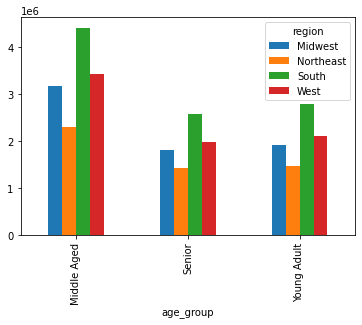

In [70]:
age_region_bar = age_region_crosstab.plot.bar()

##### Exporting Visuals

In [71]:
age_region_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'FINAL_age_region_bar.png'))

### Age Groups and Departments

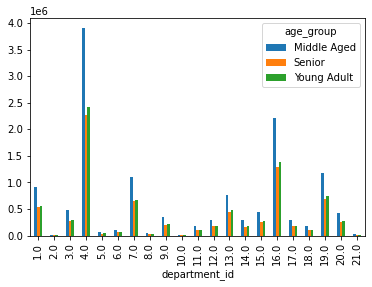

In [75]:
age_dept_bar = age_dept_crosstab.plot.bar()

##### Exporting Visuals

In [76]:
age_dept_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'FINAL_age_dept_bar.png'))

## Income Group

### Income Group and Region

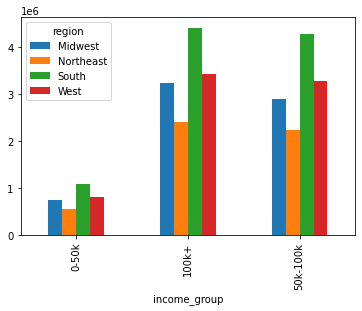

In [77]:
income_region_bar = income_region_crosstab.plot.bar()

##### Exporting Visuals

In [78]:
income_region_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'FINAL_income_region_bar.png'))

### Income Group and Departments

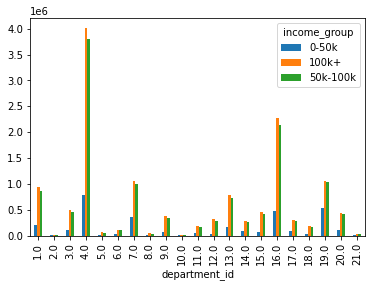

In [82]:
income_dept_bar = income_department_crosstab.plot.bar()

##### Exporting Visuals

In [83]:
income_dept_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'FINAL_income_dept_bar.png'))

## Vegan / Non-Vegan

### Vegan / Non-Vegan and Region

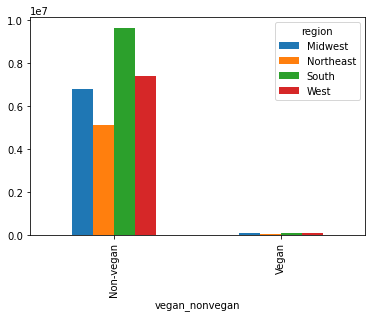

In [84]:
vegan_region_bar = vegan_region_crosstab.plot.bar()

##### Exporting Visuals

In [85]:
vegan_region_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'FINAL_vegan_region_bar.png'))

### Vegan / Non-Vegan and Departments

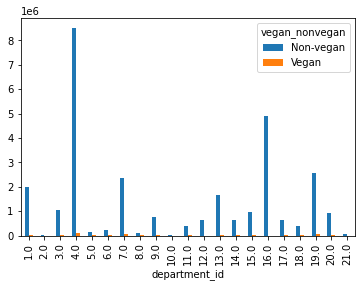

In [88]:
vegan_dept_bar = vegan_dept_crosstab.plot.bar()

##### Exporting Visuals

In [89]:
vegan_dept_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'FINAL_vegan_dept_bar.png'))

## Number of Dependants

### Number of Dependants and Region

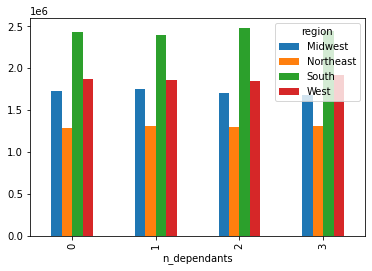

In [90]:
dependants_region_bar = dependants_region_crosstab.plot.bar()

##### Exporting Visuals

In [91]:
dependants_region_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'FINAL_dependants_region_bar.png'))

### Number of Dependants and Departments

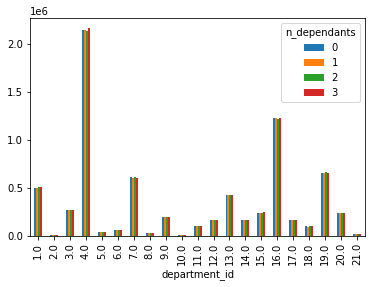

In [94]:
dependants_dept_bar = dependants_dept_crosstab.plot.bar()

##### Exporting Visuals

In [95]:
dependants_dept_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'FINAL_dependants_dept_bar.png'))

# 10) Export Final Data Set

In [97]:
df_2.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'FINAL_df.pkl'))